<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Prabhhav_Project_2_Question_UCI_Heart_Disease_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs".

For more information refer here

https://archive.ics.uci.edu/ml/datasets/heart+disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
df['thal'].unique()

array([1, 2, 3, 0])

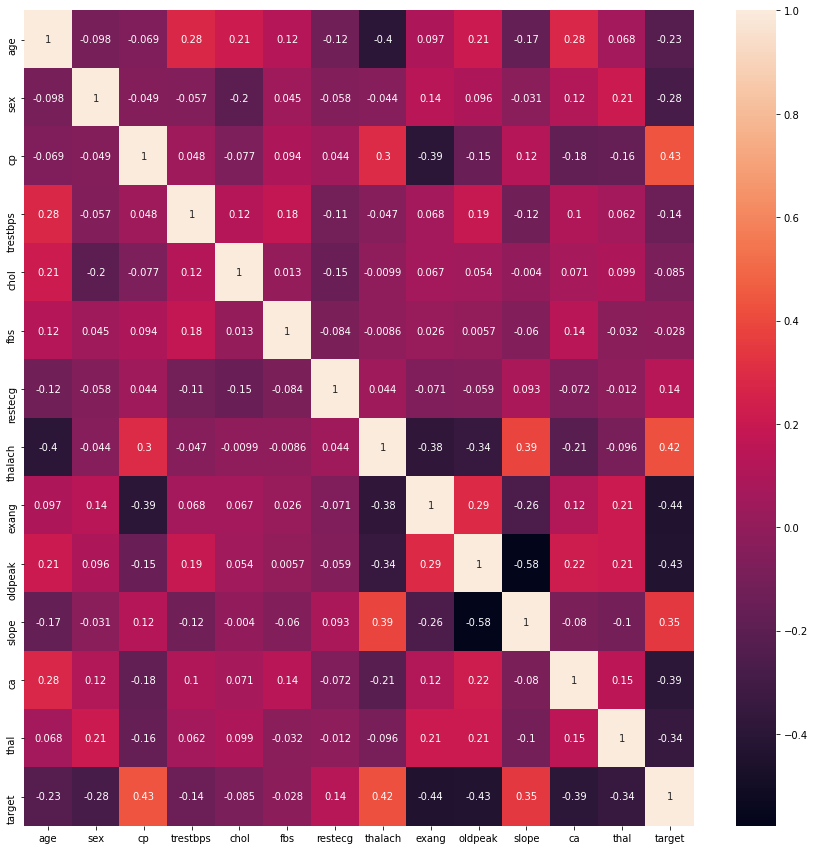

In [9]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [10]:
array = df.values
X = array[:,0:13]
y = array[:,13]

In [11]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [12]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y,test_size=0.20, random_state=1)

In [15]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,y, test_size= 0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [17]:
lr = LogisticRegression(max_iter=10000)

In [18]:
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
lr.predict(X_validation)

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])

In [23]:
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

NameError: ignored

Modeling

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

In [55]:
comparison = {"Algorithm":[],"Training score":[],"Testing score":[]}

1) Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('std',StandardScaler()),('Log_reg',LogisticRegression())])
pipe.fit(X_train,Y_train)

print("Training score:", pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("LogisticRegression")
comparison["Training score"].append(pipe.score(X_train, Y_train))
comparison["Testing score"].append(pipe.score(X_test, Y_test))

Training score: 0.8636363636363636
Testing score: 0.7868852459016393


2) Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('dtc',DecisionTreeClassifier())])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("DecisionTreeClassifier")
comparison["Training score"].append(pipe.score(X_train,Y_train))
comparison["Testing score"].append(pipe.score(X_test,Y_test))

Training Score: 1.0
Testing score: 0.6721311475409836


3) RandomForest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('rfc',RandomForestClassifier())])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("RandomForestClassifier")
comparison["Training score"].append(pipe.score(X_train,Y_train))
comparison["Testing score"].append(pipe.score(X_test,Y_test))

Training Score: 1.0
Testing score: 0.7868852459016393


Adaboost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
pipe = Pipeline([('ada',AdaBoostClassifier())])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("AdaBoostClassifier")
comparison["Training score"].append(pipe.score(X_train,Y_train))
comparison["Testing score"].append(pipe.score(X_test,Y_test))

Training Score: 0.9586776859504132
Testing score: 0.7540983606557377


Adaboost with logistic regression

In [60]:
pipe = Pipeline([('std',StandardScaler()),('ada',AdaBoostClassifier(base_estimator=LogisticRegression()))])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("AdaBoostClassifier with logistic regression")
comparison["Training score"].append(pipe.score(X_train,Y_train))
comparison["Testing score"].append(pipe.score(X_test,Y_test))

Training Score: 0.8636363636363636
Testing score: 0.7704918032786885


Ada boosting with decsion stump

In [61]:
pipe = Pipeline([('ada',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)))])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("AdaBoostClassifier with decision stump")
comparison["Training score"].append(pipe.score(X_train,Y_train))
comparison["Testing score"].append(pipe.score(X_test,Y_test))

Training Score: 0.9586776859504132
Testing score: 0.7540983606557377


Naive bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('mul_nb', MultinomialNB())])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("MultinomialNB")
comparison["Training score"].append(pipe.score(X_train,Y_train))



Training Score: 0.7644628099173554
Testing score: 0.7540983606557377


6) KNN classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,40):
 pipe = Pipeline([('std',StandardScaler()),('knn', KNeighborsClassifier(i))])
 pipe.fit(X_train,Y_train)
 knr_pred = pipe.predict(X_test)
error.append(np.mean(Y_test!= knr_pred))

ValueError: ignored

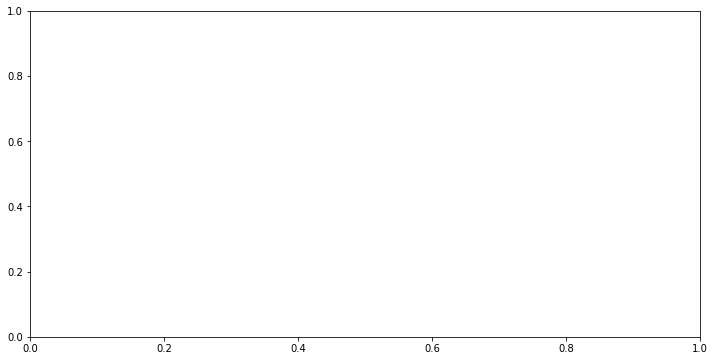

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [65]:
err_array= np.array(error)
neighbours = err_array.argmin() +1
neighbours

1

In [66]:
pipe = Pipeline([('std',StandardScaler()),('knn',KNeighborsClassifier(neighbours))])
pipe.fit(X_train,Y_train)

print("Training Score:",pipe.score(X_train,Y_train))
print("Testing score:",pipe.score(X_test,Y_test))

comparison["Algorithm"].append("KNeighborsClassifier")
comparison["Training score"].append(pipe.score(X_train,Y_train))
comparison["Testing score"].append(pipe.score(X_test,Y_test))

Training Score: 1.0
Testing score: 0.7377049180327869


In [67]:
results = pd.DataFrame(comparison)
results

ValueError: ignored

CV

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))

In [70]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'

In [71]:
results = []
names = []

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [73]:
for name, model in models:
  kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print("cv_results", cv_results)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 

cv_results [0.72131148 0.83606557 0.85       0.86666667]
LR: 0.818511 (0.057154)
cv_results [0.63934426 0.60655738 0.7        0.58333333]
KNN: 0.632309 (0.043856)
cv_results [0.6557377  0.73770492 0.7        0.76666667]
CART: 0.715027 (0.041599)
cv_results [0.81967213 0.81967213 0.83333333 0.8       ]
NB: 0.818169 (0.011881)
cv_results [0.55737705 0.57377049 0.56666667 0.56666667]
SVM: 0.566120 (0.005822)
cv_results [0.7704918  0.83606557 0.83333333 0.85      ]
RF: 0.822473 (0.030670)


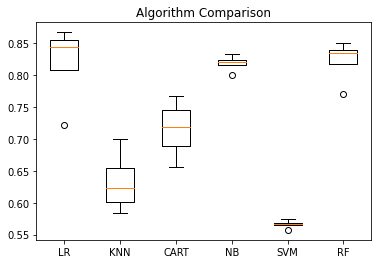

In [74]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [75]:
rf = RandomForestClassifier()

In [76]:
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)

In [77]:
print(accuracy_score(Y_validation, predictions))

0.9672131147540983


In [78]:
print(confusion_matrix(Y_validation,predictions))

[[28  2]
 [ 0 31]]


In [79]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        30
         1.0       0.94      1.00      0.97        31

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



Evaluation metrics

In [80]:
from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='gini') # entrophy or gini
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
Y_hat = dtree.predict(X_test)
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71        33
         1.0       0.66      0.75      0.70        28

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



In [82]:
knn = KNeighborsClassifier(n_neighbors=4)

In [83]:
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)

0.768595041322314

From the above comparison we can say that random forest classifer is giving better score so lets work on optimizing parameters of that

In [84]:
from sklearn.model_selection import GridSearchCV

In [86]:
pipe = Pipeline([('std',StandardScaler()),('rfc',RandomForestClassifier())])

In [87]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [89]:
params= {
    'std__with_mean': [True,False],
    'std__with_std': [True,False],

    'rfc__n_estimators':[400,500,600],
    'rfc__criterion':['gini', 'entropy'],
    'rfc__max_features': ['auto', 'sqrt', 'log2'],
    'rfc__bootstrap': [True,False],        
}

In [90]:
clf = GridSearchCV(pipe,param_grid=params,cv=4)
clf.fit(X_train,Y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                 

In [91]:
clf.best_params_

{'rfc__bootstrap': True,
 'rfc__criterion': 'entropy',
 'rfc__max_features': 'auto',
 'rfc__n_estimators': 500,
 'std__with_mean': False,
 'std__with_std': False}

In [92]:
clf.score(X_test,Y_test)

0.8032786885245902

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
print(classification_report(Y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80        33
         1.0       0.74      0.89      0.81        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



We can get an accuracy of 95%

[[24  9]
 [ 3 25]]


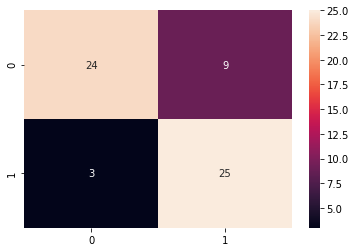

In [96]:
print(confusion_matrix(Y_test, clf.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,clf.predict(X_test)),annot=True)

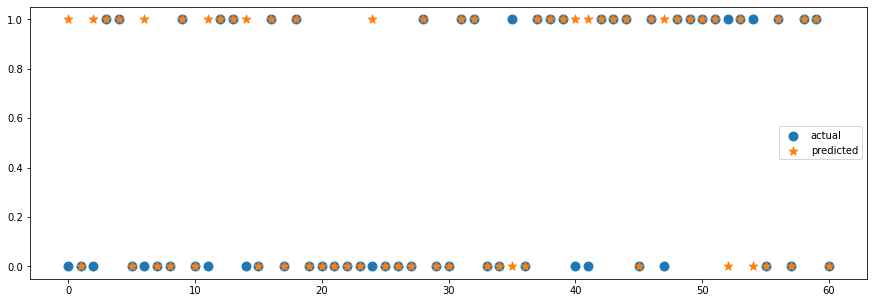

In [97]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(Y_test)), Y_test, s=80, label = 'actual')
plt.scatter(range(len(clf.predict(X_test))), clf.predict(X_test), s=80, marker='*', label='predicted')
plt.legend()